In [62]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [64]:
# Training Data
x0=[3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,\
   7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
y0=[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,\
   2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]
# Testing Data
x1=[6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]
y1=[1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]

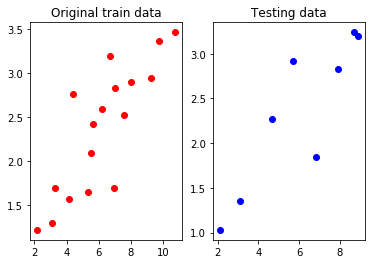

In [65]:
# data illustration
plt.subplot(121)
plt.title('Original train data')
plt.plot(x0, y0, 'ro')
plt.subplot(122)
plt.title('Testing data')
plt.plot(x1, y1, 'bo')
plt.show()

In [66]:
# data process
# referring: numpy.array numpy.reshape
x0 = np.array(x0, dtype = np.float32).reshape(-1, 1)
print(x0)
y0 = np.array(y0, dtype = np.float32).reshape(-1, 1)
print(y0)

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]
[[1.7  ]
 [2.76 ]
 [2.09 ]
 [3.19 ]
 [1.694]
 [1.573]
 [3.366]
 [2.596]
 [2.53 ]
 [1.221]
 [2.827]
 [3.465]
 [1.65 ]
 [2.904]
 [2.42 ]
 [2.94 ]
 [1.3  ]]


In [67]:
# train process
# step1 Graph Input
# referring: tf.placeholder
x_train = tf.placeholder(tf.float32,(None,1))
y_train = tf.placeholder(tf.float32,(None,1))

In [68]:
# step2 Set model weights
# referring: tf.Variable

w=tf.Variable(np.random.rand(1,1),dtype=tf.float32)
b=tf.Variable(np.random.rand(1,),dtype=tf.float32)

In [69]:
# step3 Construct a logistic model
# referring: y=wx+b

pred=tf.add(tf.matmul(x_train,w),b)

In [70]:
# step4 Construct (Mean squared) loss
# referring: tf.reduce_mean tf.reduce_sum

loss=tf.reduce_mean(tf.pow(pred-y_train,2))

In [71]:
# step5 Declare optimizer method
# referring: tf.train.GradientDescentOptimizer tf.train.AdamOptimizer

optim=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [72]:
# step6 Create session, initial variables, feed data and print result
# referring: tf.Session() Sess.run()\
# tf.global_variables_initializer() tf.local_variables_initializer() 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())

    #start train model
    for epoch in range(training_epochs):
        pred_y,l,_=sess.run([pred,loss,optim],feed_dict={x_train:x0,y_train:y0})
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch {:4d} cost: {:.9f}".format((epoch + 1),l))
    print("Optimization Finished!")
    final_w=np.squeeze(sess.run(w))
    final_b=np.squeeze(sess.run(b))
    print("Training modal w: {:.5f}, b: {:.5f}".format(final_w,final_b))

Epoch   50 cost: 0.182718739
Epoch  100 cost: 0.176491216
Epoch  150 cost: 0.171607450
Epoch  200 cost: 0.167777419
Epoch  250 cost: 0.164773911
Epoch  300 cost: 0.162418440
Epoch  350 cost: 0.160571247
Epoch  400 cost: 0.159122586
Epoch  450 cost: 0.157986552
Epoch  500 cost: 0.157095656
Epoch  550 cost: 0.156396970
Epoch  600 cost: 0.155849069
Epoch  650 cost: 0.155419350
Epoch  700 cost: 0.155082345
Epoch  750 cost: 0.154818058
Epoch  800 cost: 0.154610902
Epoch  850 cost: 0.154448345
Epoch  900 cost: 0.154320896
Epoch  950 cost: 0.154220939
Epoch 1000 cost: 0.154142544
Optimization Finished!
Training modal w: 0.25838, b: 0.75095


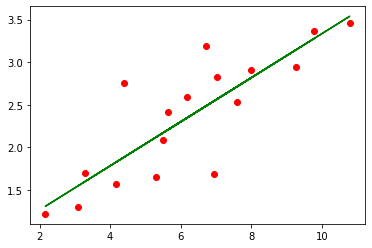

In [73]:
# display the fitting line
# plot the trained model point(input x and output y0')
plt.plot(x0, y0, 'ro', label='Original data')
plt.plot(x0,final_w * x0 + final_b, 'g',label='Fitted line')
plt.show()

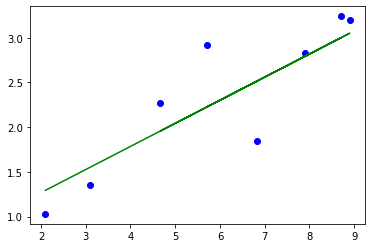

In [74]:
# test process
# same method as train above to get predict y

x1 = np.array(x1, dtype = np.float32).reshape(-1, 1)
y1 = np.array(y1, dtype = np.float32).reshape(-1, 1)

# display the test result
plt.plot(x1, y1, 'bo', label='Testing data')
plt.plot(x1,x1 * final_w + final_b , 'g',label='Fitted line')
plt.show()